In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [26]:
filename = 'C:/Users/Yarik/Desktop/IASA/TEST TASK (dataset).csv'

In [27]:
df_csv = pd.read_csv(filename)

In [28]:
#Метод відкидання зайвих чисел після коми
#f- число, n - кількість знаків після коми, яке залишаєм
def rejection_number (f,n):
    return ((f * 10**n) // 1) / 10**n

Для початку дізнаємось скільки людей використовують застосунок на певній платформі.

In [29]:
platformData_count = df_csv[['target_full_ltv_day30', 'platform']]\
    .groupby(['platform'], group_keys=True)\
    .count()
platformData_count.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
platform,
android,887426
ios,580406


Після чого ми дізнаємось скільки всього значень в дата сеті, з чого можем зробити висновок про відсоткове значення вибору платформи для використання додатку. 

In [30]:
platformData_rate_count = df_csv[['target_full_ltv_day30']]\
    .count()
platformData_rate_count.head()

target_full_ltv_day30    1467832
dtype: int64

In [31]:
Android_persent = (887426 * 100)/1467832
print("Android persent = ", Android_persent)

Android persent =  60.458281329198435


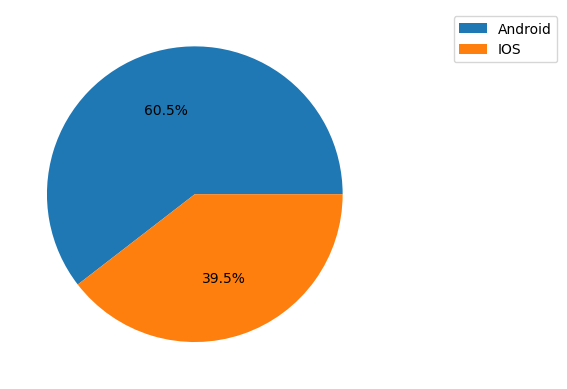

In [32]:
# Створення списку об'єктів
platforms = ['Android', 'IOS'] 

# Створення списку відповідних значень
data = [60.46, 100 - 60.46] 
  
# Створення plot .figure(figsize =(10, 7)) 
plt.pie(data, autopct='%1.1f%%') 

# Adding legend 
plt.legend(platforms, bbox_to_anchor =(1, 0, 0.5, 1)) 
  
# Вивід кругової діаграми 
plt.show()

З вище вказаних даних видно, що більшість користувачів використовуют платформу андроїд. 
Тепер переглянемо скільки прибутку приносять користувачі з кожної платформи.


In [33]:
platformData_sum = df_csv[['platform', 'target_sub_ltv_day30', 'target_iap_ltv_day30', 'target_ad_ltv_day30', 'target_full_ltv_day30']]\
    .groupby(['platform'], group_keys=True)\
    .sum()
platformData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
platform,,,,
ios,25303.603837,241203.277020,22436.180010,288943.060867
android,7033.283064,72805.257615,8264.586739,88103.127418


In [34]:
ios_profit = (288943.060867 * 100)/(288943.060867+88103.127418)
print("ios profit = ", ios_profit)

ios profit =  76.63333295617221


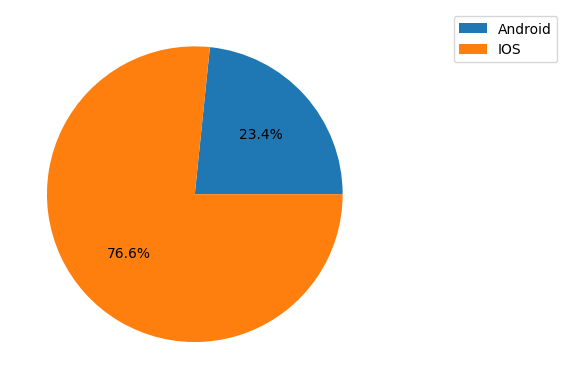

In [35]:
# Створення списку об'єктів
platforms = ['Android', 'IOS'] 

# Створення списку відповідних значень
data = [100 - 76.63, 76.63] 
  
# Створення plot .figure(figsize =(10, 7)) 
plt.pie(data, autopct='%1.1f%%') 

# Adding legend 
plt.legend(platforms, bbox_to_anchor =(1, 0, 0.5, 1)) 
  
# Вивід кругової діаграми 
plt.show()

З цієї діаграми видно що користувачі з платформи ios приносять понад 76% прибутку.
Також варто розглянути корреляцію прибутку по джерелам між двума платформати.
На платформі IOS більшість прибутку складає сервіс підписки, а найменший перегляд реклами, а на Android - навпаки.

З цього можна зробити висновок що користувачі на платформі IOS більш цінні, і найбільший прибуток приносить саме сервіс підписок. 
На це варто звернути увагу при розробці та навчання моделі.

По тій причині що модель легше навчати на числових даних ми можем їх замінити на числові значення
IOS - 1
Android - 0
Значення були так розподілені по причині того , що саме IOS має більшу перевану в моделі.

In [36]:
binary_platform = {"ios" : 1 ,"android" : 0}
df_csv['platform'] = df_csv['platform'].map(binary_platform)
df_csv.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


В нас залишилась ще одна подібна змінна, це "country_code", переглянемо яке з значень наймажливіше, те і буде найближчим до 1, а найслабше, найближче до 0.

In [37]:
mediaSourceData_sum = df_csv[['target_full_ltv_day30', 'media_source']]\
    .groupby(['media_source'], group_keys=True)\
    .sum()
mediaSourceData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
media_source,
SOURCE_17,178081.217393
SOURCE_23,88381.038661
SOURCE_4,58684.510253
SOURCE_1,11350.813876
SOURCE_2,9140.568484
SOURCE_10,8457.155253
SOURCE_5,7016.308524
SOURCE_6,6402.577282
SOURCE_18,2293.067194


Ми можем дізнатись скільки прибутку принесуть користувачі які прийшли з певниз медіа ресурсів.

In [38]:
mediaSourceData_sum["Percent"] = np.where(mediaSourceData_sum["target_full_ltv_day30"],
                                          rejection_number((rejection_number(mediaSourceData_sum["target_full_ltv_day30"], 2)*100)/377046.2, 2),
                                          0)
mediaSourceData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30,Percent
media_source,,
SOURCE_17,178081.217393,47.23
SOURCE_23,88381.038661,23.44
SOURCE_4,58684.510253,15.56
SOURCE_1,11350.813876,3.01
SOURCE_2,9140.568484,2.42
SOURCE_10,8457.155253,2.24
SOURCE_5,7016.308524,1.86
SOURCE_6,6402.577282,1.69
SOURCE_18,2293.067194,0.60


Дізнавшись які медіа впливають найбільше можем надати їм відповідні коофіцієнти базуючись на їх значенні, і замінити їх зі значень строкового типу, за числові значення.

In [15]:
binary_media_source = {"SOURCE_17" : 0.472 ,
                       "SOURCE_23" : 0.234 ,
                       "SOURCE_4" : 0.156 ,
                       "SOURCE_1" : 0.301 ,
                       "SOURCE_2" : 0.024 ,
                       "SOURCE_10" : 0.022 ,
                       "SOURCE_5" : 0.019 ,
                       "SOURCE_6" : 0.017 ,
                       "SOURCE_18" : 0.006 ,
                       "SOURCE_19" : 0.005 ,
                       "SOURCE_16" : 0.005 ,
                       "SOURCE_12" : 0.003 ,
                       "SOURCE_14" : 0.002 ,
                       "SOURCE_9" : 0.001,
                       "SOURCE_7" : 0 ,
                       "SOURCE_3" : 0 ,
                       "SOURCE_8" : 0 ,
                       "SOURCE_21" : 0 ,
                       "SOURCE_22" : 0 ,
                       "SOURCE_11" : 0 ,
                       "SOURCE_15" : 0 ,
                       "SOURCE_0" : 0 ,
                       "SOURCE_13" : 0 ,
                       "SOURCE_20" : 0
                      }

In [39]:
df_csv['media_source'] = df_csv['media_source'].map(binary_media_source)
mediaSourceData_sum = df_csv[['target_full_ltv_day30', 'media_source']]\
    .groupby(['media_source'], group_keys=True)\
    .sum()
mediaSourceData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
media_source,
0.472,178081.217393
0.234,88381.038661
0.156,58684.510253
0.301,11350.813876
0.024,9140.568484
0.022,8457.155253
0.019,7016.308524
0.017,6402.577282
0.005,3963.324037


Остання строкова змінна це змінна країни, наділимо її коофіцієнтом за вагою.

In [17]:
СountryСodeData_sum = df_csv[['target_full_ltv_day30', 'country_code']]\
    .groupby(['country_code'], group_keys=True)\
    .sum()
СountryСodeData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
country_code,
COUNTRY_141,235195.833606
COUNTRY_155,65447.934889
COUNTRY_38,22037.631186
COUNTRY_72,21639.449274
COUNTRY_129,3281.257060
...,...
COUNTRY_47,0.000000
COUNTRY_70,0.000000
COUNTRY_48,0.000000


In [18]:
СountryСodeData_sum["Percent_Country"] = np.where(СountryСodeData_sum["target_full_ltv_day30"],
                                          rejection_number((rejection_number(СountryСodeData_sum["target_full_ltv_day30"], 2)*100)/377046.2, 2),
                                          0)
СountryСodeData_sum.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30,Percent_Country
country_code,,
COUNTRY_141,235195.833606,62.37
COUNTRY_155,65447.934889,17.35
COUNTRY_38,22037.631186,5.84
COUNTRY_72,21639.449274,5.73
COUNTRY_129,3281.257060,0.87
...,...,...
COUNTRY_47,0.000000,0.00
COUNTRY_70,0.000000,0.00
COUNTRY_48,0.000000,0.00


Отримавши вагу для кожного значення ми можем побачити, що вагомими є лише перші 10, хоча їх всього 224. Тому для навчання моделі ними можна знехтувати.
Далі ми маєм замінити строкові значенння, на числові, однак вручну як і раніше буде довго, тому ми візмем отримані дані, та створимо з них словник значень за допомогою додаткових автоматичних операцій.

In [19]:
list_country_code_val = СountryСodeData_sum['Percent_Country'].tolist()
list_country_code = df_csv['country_code'].tolist()


#Видалення дублікатів в списку
list_country_code = [*set(list_country_code)]

list_country_code_val[48]

62.37

In [20]:
# перетворити списки в словник
emumerete_country_code = {}
for key in list_country_code:
    for value in list_country_code_val:
        emumerete_country_code[key] = 0.0
        break  

In [21]:
#При створенні словника ми вписували всім значенням 0, тут ми ставим кодам країн їх значення
emumerete_country_code.update([('COUNTRY_141', 0.624),('COUNTRY_155', 0.174),('COUNTRY_38', 0.058),('COUNTRY_72', 0.057),('COUNTRY_129', 0.008)])

In [22]:
emumerete_country_code.get('COUNTRY_141')

0.624

In [23]:
#Замінюємо значення
df_csv['country_code'] = df_csv['country_code'].map(emumerete_country_code)

In [24]:
df_csv.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,0.000,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,0.624,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,0.624,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,0.624,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,0.000,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
